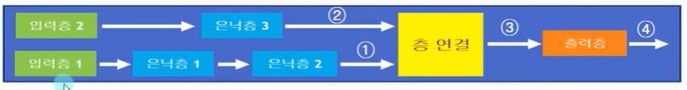

In [3]:
# 다중 입력에 대한 Functional API 모델 구축 예시

from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 입력층 1 에 대한 신경망
input_1 = Input(shape=(4,))

hidden_1 = Dense(8, activation='relu')(input_1)
hidden_2 = Dense(16, activation='relu')(hidden_1)

output_1 = Model(inputs=input_1, outputs=hidden_2) # 1

# 입력층 2 에 대한 신경망
input_2 = Input(shape=(8, ))

hidden_3 = Dense(8, activation='relu')(input_2)

output_2 = Model(inputs=input_2, outputs=hidden_3) # 2

# 층 연결
result = concatenate([output_1.output, output_2.output]) # 3

# 출력층 정의
output_ = Dense(10, activation='softmax')(result) # 4

# 최종 모델 구축
model = Model(inputs=[output_1.input , output_2.input], outputs=output_)

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 8)            40          ['input_3[0][0]']                
                                                                                                  
 input_4 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 16)           144         ['dense_4[0][0]']                
                                                                                            

[1] MNIST 데이터 불러오기 및 정규화

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # 데이터 불러오기

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1) # 텐서로 변환 (높이, 너비, 채널)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0 # 정규화

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


[2] Functional API CNN 모델구축

In [6]:
input_ = Input(shape=(28, 28, 1))

x = Conv2D(32, 3, activation='relu')(input_)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

output_ = Dense(10, activation='softmax')(x)

cnn = Model(inputs=input_, outputs=output_)

Conv -> Conv -> Pool -> Dropout -> Flat -> Dense -> Dropout -> Dense

[3] CNN모델 컴파일 및 학습

In [7]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 118s 246ms/step - loss: 0.2407 - accuracy: 0.9261 - val_loss: 0.0516 - val_accuracy: 0.9833
Epoch 2/30
469/469 [==============================] - 113s 240ms/step - loss: 0.0879 - accuracy: 0.9732 - val_loss: 0.0363 - val_accuracy: 0.9886
Epoch 3/30
469/469 [==============================] - 113s 242ms/step - loss: 0.0657 - accuracy: 0.9803 - val_loss: 0.0323 - val_accuracy: 0.9896
Epoch 4/30
469/469 [==============================] - 113s 241ms/step - loss: 0.0534 - accuracy: 0.9840 - val_loss: 0.0315 - val_accuracy: 0.9901
Epoch 5/30
469/469 [==============================] - 116s 248ms/step - loss: 0.0460 - accuracy: 0.9857 - val_loss: 0.0274 - val_accuracy: 0.9911
Epoch 6/30
469/469 [==============================] - 117s 249ms/step - loss: 0.0408 - accuracy: 0.9870 - val_loss: 0.0273 - val_accuracy: 0.9908
Epoch 7/30
469/469 [==============================] - 117s 249ms/step - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0288 -

[4] 모델(정확도) 평가

In [8]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.0340 - accuracy: 0.9928


[0.034020811319351196, 0.9927999973297119]

[5] 정확도 및 손실

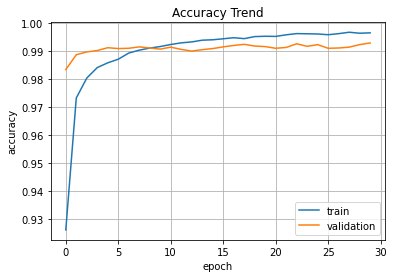

In [10]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

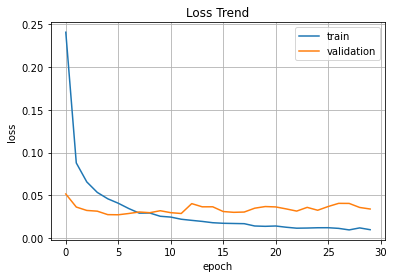

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

Functional API에서 동일한 의미를 갖지만, 1 line으로 표현할 수 있는 코드를 2line으로 표현한 경우에 있어 일반 함수를 호출하는 경우로 혼동할 수 있음

In [ ]:
input_ = Input(shape=(28, 28, 1))

x = Conv2D(32, 3, activation='relu')          #
x = x(input_)                                              # ->  x = Conv2D(32, 3, activation='relu')(input_) 옆 두줄과 동일 코드

x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

output_ = Dense(10, activation='softmax')# 
output_ = output_(x)                                  # -> output_ = Dense(10, activation='softmax')(x) 옆 두줄과 동일 코드

cnn = Model(inputs=input_, outputs=output_)